# Freelance Pay Data Analysis and Forecasting

#### Import the data and view first 5 Rows

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

In [59]:
# Define the path to the cleaned data
cleaned_data_path = '../data/earnings_data.csv'
holidays_data_path = '../data/holidays.csv'

# Load the data
df_cleaned = pd.read_csv(cleaned_data_path)
holidays_df = pd.read_csv(holidays_data_path)

# Display the first few rows
print(df_cleaned.head())

                                      Period  Amount Status
0  2024-12-06 00:00:00 - 2024-12-12 23:59:59  272.22   Paid
1  2024-11-29 00:00:00 - 2024-12-05 23:59:59  205.11   Paid
2  2024-11-22 00:00:00 - 2024-11-28 23:59:59  310.00   Paid
3  2024-11-15 00:00:00 - 2024-11-21 23:59:59  304.52   Paid
4  2024-11-08 00:00:00 - 2024-11-14 23:59:59  253.83   Paid


#### Add columns with start and end dates for clear time period distinction

In [60]:
# Split Period into Start_Date and End_Date
df_cleaned[['Start_Date', 'End_Date']] = df_cleaned['Period'].str.split(' - ', expand=True)
df_cleaned['Start_Date'] = pd.to_datetime(df_cleaned['Start_Date'])
df_cleaned['End_Date'] = pd.to_datetime(df_cleaned['End_Date'])
# df_cleaned.drop("Day_of_Week", axis='columns')


# df_split_dates = df_cleaned.drop("Day_of_Week", axis='columns')
# df_split_dates.to_csv('../data/earnings_data_with_date_split.csv', index=False)

In [61]:
print(df_cleaned.head())

                                      Period  Amount Status Start_Date  \
0  2024-12-06 00:00:00 - 2024-12-12 23:59:59  272.22   Paid 2024-12-06   
1  2024-11-29 00:00:00 - 2024-12-05 23:59:59  205.11   Paid 2024-11-29   
2  2024-11-22 00:00:00 - 2024-11-28 23:59:59  310.00   Paid 2024-11-22   
3  2024-11-15 00:00:00 - 2024-11-21 23:59:59  304.52   Paid 2024-11-15   
4  2024-11-08 00:00:00 - 2024-11-14 23:59:59  253.83   Paid 2024-11-08   

             End_Date  
0 2024-12-12 23:59:59  
1 2024-12-05 23:59:59  
2 2024-11-28 23:59:59  
3 2024-11-21 23:59:59  
4 2024-11-14 23:59:59  


- ### Basic Statistical Summaries

##### Summary Stats

In [62]:
print(df_cleaned['Amount'].describe())

count    168.000000
mean      82.271131
std       73.487300
min        2.520000
25%       24.892500
50%       56.855000
75%      128.707500
max      310.000000
Name: Amount, dtype: float64


##### Date Range

In [63]:
print(df_cleaned['Start_Date'].min(), df_cleaned['Start_Date'].max())

2021-07-30 08:49:14 2024-12-06 00:00:00


- ### Visualization

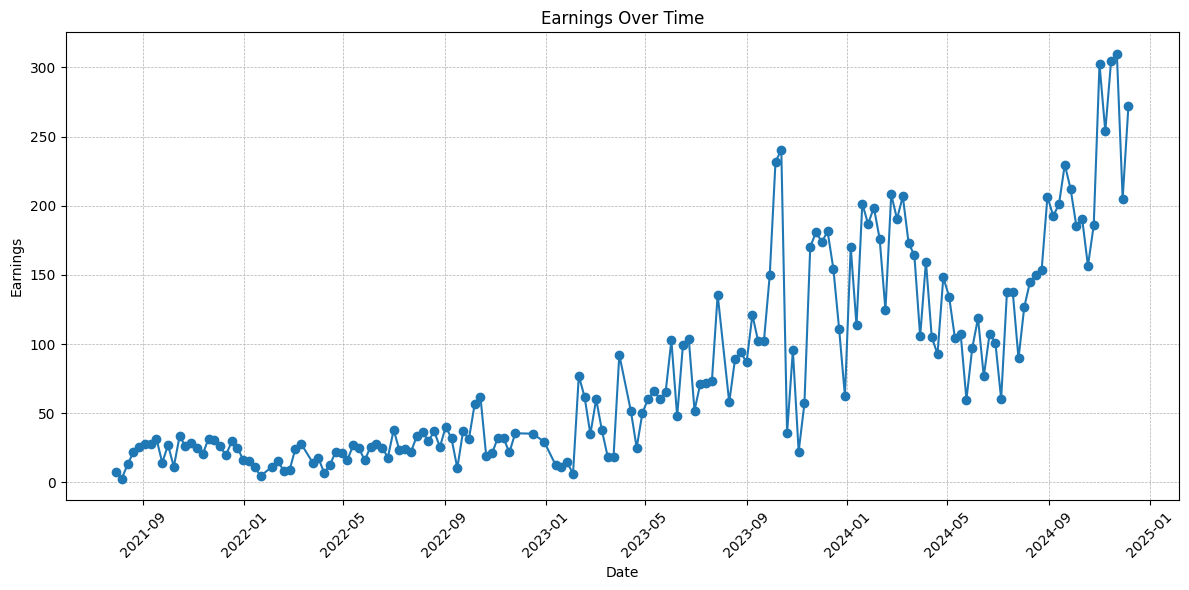

In [64]:
# Plot earnings (Amount) over time (using Start_Date or End_Date) to see if there are upward or downward trends, seasonal fluctuations, or regular patterns.

# Sort by date to ensure a continuous timeline
df_cleaned = df_cleaned.sort_values('Start_Date')

plt.figure(figsize=(12,6))
plt.plot(df_cleaned['Start_Date'], df_cleaned['Amount'], marker='o')
plt.title('Earnings Over Time')
plt.xlabel('Date')
plt.ylabel('Earnings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

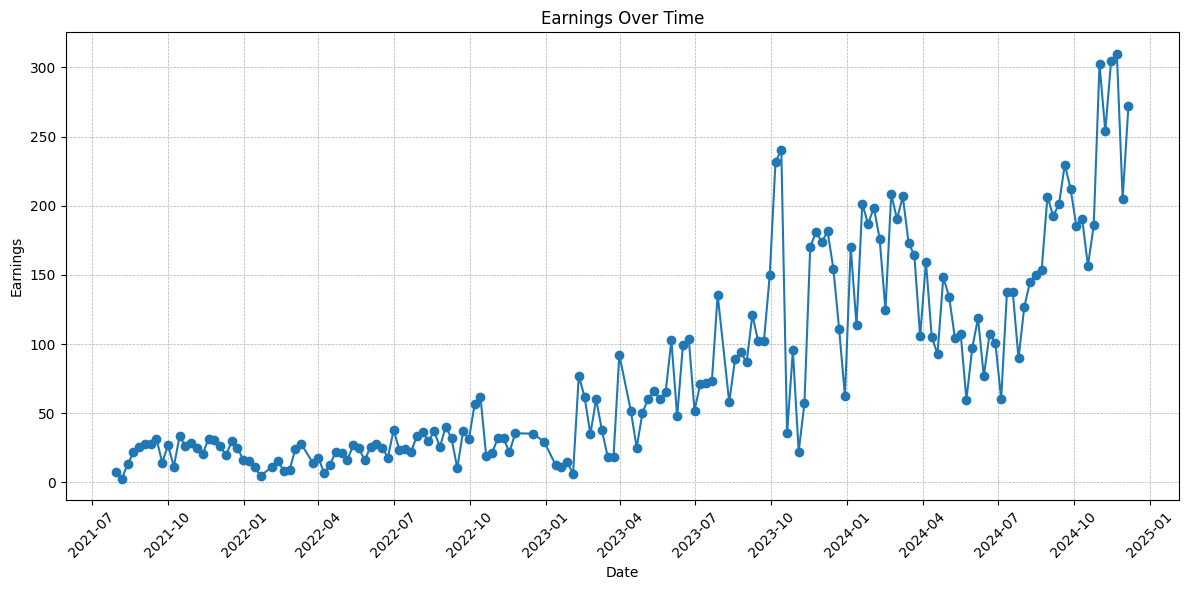

In [65]:
# Quarterly Trends

plt.figure(figsize=(12,6))
plt.plot(df_cleaned['Start_Date'], df_cleaned['Amount'], marker='o')
plt.title('Earnings Over Time')
plt.xlabel('Date')
plt.ylabel('Earnings')

# Use MonthLocator to set quarterly ticks: January, April, July, October
quarter_months = [1, 4, 7, 10]
quarter_locator = mdates.MonthLocator(bymonth=quarter_months)

# Set the date formatter to show Year-Month or Year-Qtr format
quarter_formatter = mdates.DateFormatter('%Y-%m')

ax = plt.gca()
ax.xaxis.set_major_locator(quarter_locator)
ax.xaxis.set_major_formatter(quarter_formatter)

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(linestyle='--', linewidth=0.5)
plt.show()


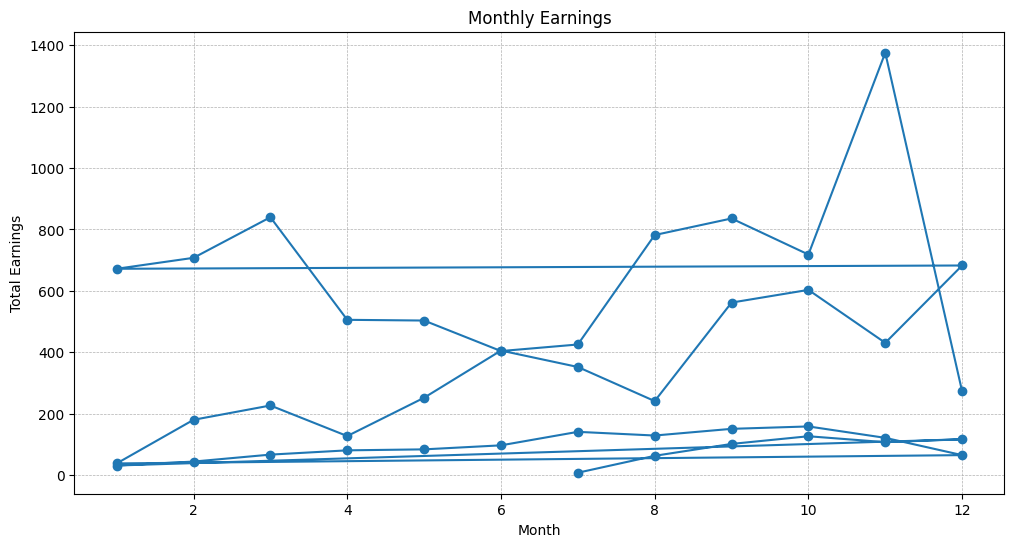

In [66]:
# Group the data by month and compute total or average earnings to see if there’s a clear trend. 

# Extract month and year from Start_Date
df_cleaned['Year'] = df_cleaned['Start_Date'].dt.year
df_cleaned['Month'] = df_cleaned['Start_Date'].dt.month

monthly_earnings = df_cleaned.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_earnings['Month'], monthly_earnings['Amount'], marker='o')
plt.title('Monthly Earnings')
plt.xlabel('Month')
plt.ylabel('Total Earnings')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

##### Select the Year to find Data for a specific Year

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from ipywidgets import interact, Dropdown

# Ensure df_cleaned is already loaded and Start_Date is datetime
# Example: df_cleaned['Start_Date'] = pd.to_datetime(df_cleaned['Start_Date'])

# Extract the year and month for convenience
df_cleaned['Year'] = df_cleaned['End_Date'].dt.year
df_cleaned['Month'] = df_cleaned['End_Date'].dt.month

# Get the list of unique years
unique_years = sorted(df_cleaned['Year'].unique())

def plot_yearly_monthly_earnings(year):
    # Filter for the selected year
    df_year = df_cleaned[df_cleaned['Year'] == year]
    
    # Group by month and sum up Amount
    monthly_earnings_year = df_year.groupby('Month', as_index=False)['Amount'].sum()
    
    # Convert month numbers to names
    monthly_earnings_year['Month_Name'] = monthly_earnings_year['Month'].apply(lambda x: calendar.month_name[x])
    
    # Sort by month number to ensure correct order
    monthly_earnings_year = monthly_earnings_year.sort_values('Month')
    
    # Plot
    plt.figure(figsize=(12,6))
    plt.bar(monthly_earnings_year['Month_Name'], monthly_earnings_year['Amount'], color='skyblue')
    plt.title(f'Monthly Earnings for {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Earnings')
    plt.xticks(rotation=45)
    plt.grid(linestyle='--', linewidth=0.5, axis='y')
    plt.tight_layout()
    plt.show()

# Create a dropdown for selecting the year
year_dropdown = Dropdown(options=unique_years, description='Select Year:', value=unique_years[0])

# Use interact to update the plot when the dropdown selection changes
interact(plot_yearly_monthly_earnings, year=year_dropdown);

interactive(children=(Dropdown(description='Select Year:', options=(2021, 2022, 2023, 2024), value=2021), Outp…

##### Monthly Data for all the Years Combined

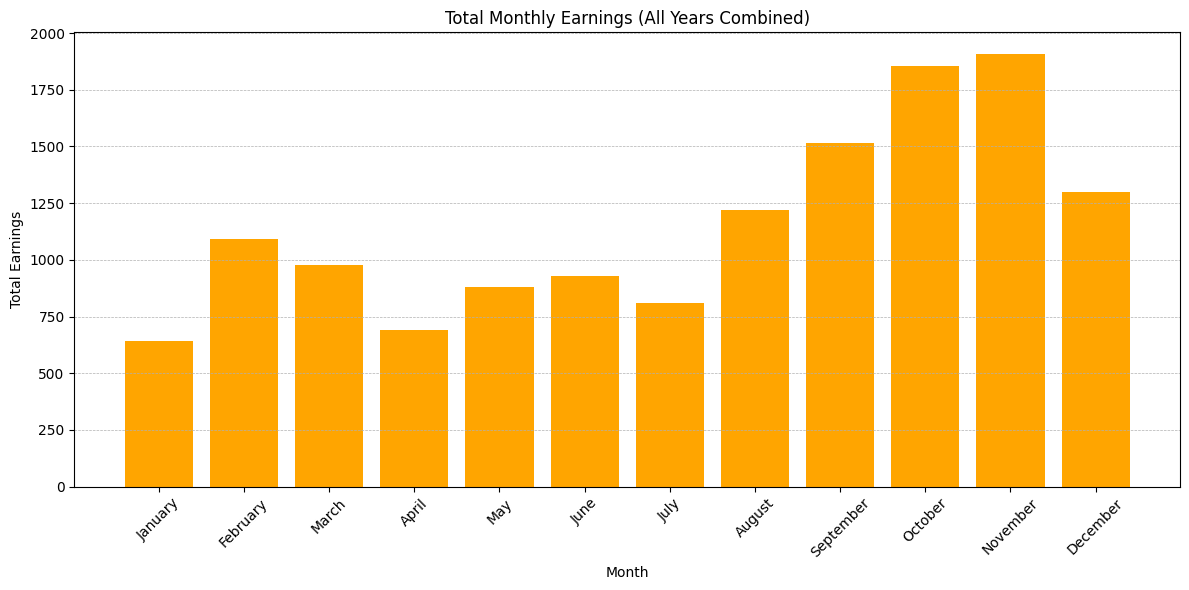

In [68]:
# Group by month only (across all years)
monthly_earnings_all = df_cleaned.groupby('Month', as_index=False)['Amount'].sum()

# Convert month numbers to month names
monthly_earnings_all['Month_Name'] = monthly_earnings_all['Month'].apply(lambda x: calendar.month_name[x])
monthly_earnings_all = monthly_earnings_all.sort_values('Month')

# Plot the total monthly earnings combined over all data
plt.figure(figsize=(12,6))
plt.bar(monthly_earnings_all['Month_Name'], monthly_earnings_all['Amount'], color='orange')
plt.title('Total Monthly Earnings (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Total Earnings')
plt.xticks(rotation=45)
plt.grid(linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

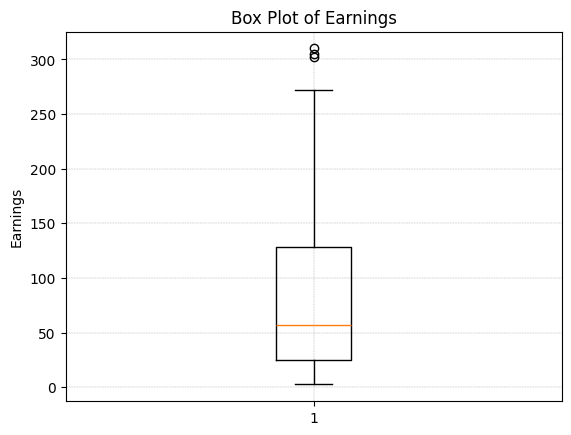

In [69]:
# check for outliers
plt.boxplot(df_cleaned['Amount'])
plt.title('Box Plot of Earnings')
plt.ylabel('Earnings')
plt.grid(linestyle='--', linewidth= 0.35)
plt.show()


In [76]:
#-------------------------------------------
# Assume holidays_df is loaded:
# holidays_df = pd.read_csv('data/holidays.csv')
# holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])

# Function to find holidays within a given interval
def holidays_in_period(start, end, holidays):
    mask = (holidays['Date'] >= start) & (holidays['Date'] <= end)
    holiday_rows = holidays[mask]
    return holiday_rows['Holiday_Name'].tolist()

# Create holiday_data dataframe to store holiday info separately
holiday_data = df_cleaned[['Start_Date', 'End_Date']].copy()

# Apply the holidays_in_period function
holiday_data['Holidays_In_Interval'] = holiday_data.apply(
    lambda row: holidays_in_period(row['Start_Date'], row['End_Date'], holidays_df), axis=1
)

# Create a boolean flag for whether any holiday occurs in that interval
holiday_data['Has_Holiday'] = holiday_data['Holidays_In_Interval'].apply(lambda x: len(x) > 0)

#-------------------------------------------
# Now create the final_df that includes the columns Amount, Start_Date, End_Date, Year, Month,
# plus holiday information from holiday_data

# Select the required columns from df_cleaned
selected_df = df_cleaned[['Amount', 'Start_Date', 'End_Date', 'Year', 'Month']].copy()

# Join the holiday_data columns to selected_df
final_df = selected_df.join(holiday_data[['Holidays_In_Interval', 'Has_Holiday']])

#-------------------------------------------
# final_df now has:
# Amount, Start_Date, End_Date, Year, Month, Holidays_In_Interval, Has_Holiday

print(final_df.head())

     Amount          Start_Date            End_Date  Year  Month  \
167    7.29 2021-07-30 08:49:14 2021-08-05 23:59:59  2021      8   
166    2.52 2021-08-06 00:00:00 2021-08-12 23:59:59  2021      8   
165   12.93 2021-08-13 00:00:00 2021-08-19 23:59:59  2021      8   
164   21.56 2021-08-20 00:00:00 2021-08-26 23:59:59  2021      8   
163   25.36 2021-08-27 00:00:00 2021-09-02 23:59:59  2021      9   

    Holidays_In_Interval  Has_Holiday  
167                   []        False  
166                   []        False  
165                   []        False  
164                   []        False  
163                   []        False  


In [77]:
final_df.groupby('Has_Holiday')['Amount'].mean()

Has_Holiday
False     78.80038
True     137.10900
Name: Amount, dtype: float64

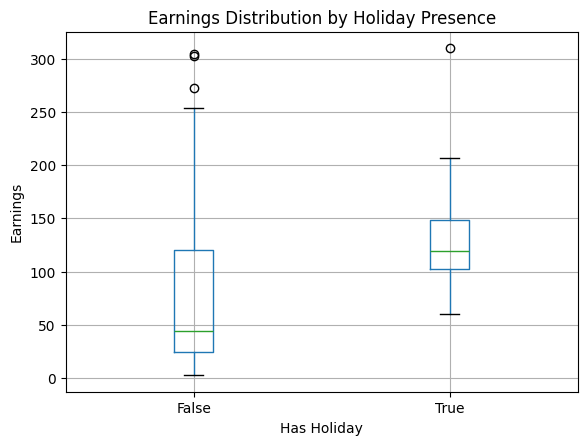

In [78]:
final_df.boxplot(column='Amount', by='Has_Holiday')
plt.title('Earnings Distribution by Holiday Presence')
plt.suptitle('')
plt.xlabel('Has Holiday')
plt.ylabel('Earnings')
plt.show()